## IP: Data Preparation (PyTorch)

In [1]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image

Approach: Image Construction using PyTorch Dataset

+ Data Loading
+ Reforming dataset using csv file
+ Store reformed dataset

In [2]:
# Import dependencies from PyTorch
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms

## Data Loading + Transformation

In [3]:
# load the image data and its labels
path = "D:\\Machine_Learning\\Portfolio_Project_Machine_Learning\\Mobile_Phone_Recognition\\datasets\\train"
class_labels = os.listdir(path)
dataset = pd.read_csv("image_dataset.csv", index_col=0)

print(f"Class labels: {class_labels}")
dataset

Class labels: ['Apple', 'Motorola', 'Nokia', 'OnePlus', 'Poco', 'Redmi', 'Samsung', 'Xiaomi']


,Image_file,Labels,Model,Company
0,image_000.jpg,Samsung SM-A156B Galaxy A15 Dual SIM 5G 4GB RA...,SM-A156B Galaxy,Samsung
1,image_001.jpg,Samsung SM-A556B Galaxy A55 5G Dual SIM 8GB 12...,SM-A556B Galaxy,Samsung
2,image_002.jpg,Motorola Moto G54 256GB Blue 5G Android Smartp...,Moto G54,Motorola
3,image_003.jpg,Xiaomi 14 Ultra 5G 16GB/512GB White (White) Du...,14 Ultra,Xiaomi
4,image_004.jpg,Samsung Galaxy S20 FE 5G 6GB/128GB Purple (Lav...,Galaxy S20,Samsung
...,...,...,...,...
795,image_795.jpg,Nokia 6303 Classic Steel 6303 (without Simlock...,6303 Classic,Nokia
796,image_796.jpg,"GenÃ©rico Galaxy S23 Ultra, 512GB Android Smar...",Galaxy S23,Samsung
797,image_797.jpg,Nokia 7230 Mobile Phone grey\r\n,7230 Mobile,Nokia
798,image_798.jpg,"Xiaomi Redmi 10 (2022) - Smartphone 64GB, 4GB ...",Redmi 10,Xiaomi


In [4]:
# Remove irrelevant variables of dataset
irrel_variables = ["Labels", "Model"]
dataset = dataset.drop(columns=irrel_variables, axis=1)

# Switch Image_file and Company from places
dataset = pd.concat([dataset["Company"], dataset["Image_file"]], axis=1)
dataset

,Company,Image_file
0,Samsung,image_000.jpg
1,Samsung,image_001.jpg
2,Motorola,image_002.jpg
3,Xiaomi,image_003.jpg
4,Samsung,image_004.jpg
...,...,...
795,Nokia,image_795.jpg
796,Samsung,image_796.jpg
797,Nokia,image_797.jpg
798,Xiaomi,image_798.jpg


In [5]:
dataset.to_csv("dataset.csv")

## Image Dataset Reconstruction

In [37]:
# Define class Dataset: reconstruct images and labels into a new dataset
class MobileImageDataset(Dataset):
  def __init__(self, csv_file, data_dir, transform=None):
    # Reconstruct dataset
    self.transform = transform 
    self.data_dir = data_dir 
    self.csv_file_dir = os.path.join(self.data_dir, csv_file)
    self.data_name = pd.read_csv(self.csv_file_dir)
    
    # Length of dataset
    self.len = self.data_name.shape[0]

  def __len__(self):
    return self.len
  def __getitem__(self, idx):
    # Load the image from dataset
    data_name = os.path.join(self.data_dir, self.data_name.iloc[idx, 2])
    mobile_image = Image.open(data_name)
    ybrand = self.data_name.iloc[idx, 1]
    
    # Transform the original mobile_image, if transformer exists
    if self.transform:
      mobile_image = self.transform(mobile_image)
    return mobile_image, ybrand

In [38]:
# Reconstruct dataset 
img_source_dir = "D:\\Machine_Learning\\Portfolio_Project_Machine_Learning\\Mobile_Phone_Recognition\\datasets\\collections\\source_images"
img_dataset = MobileImageDataset(csv_file="dataset.csv", data_dir=img_source_dir)     # no transformation

**Image Visualiation before Transformation**

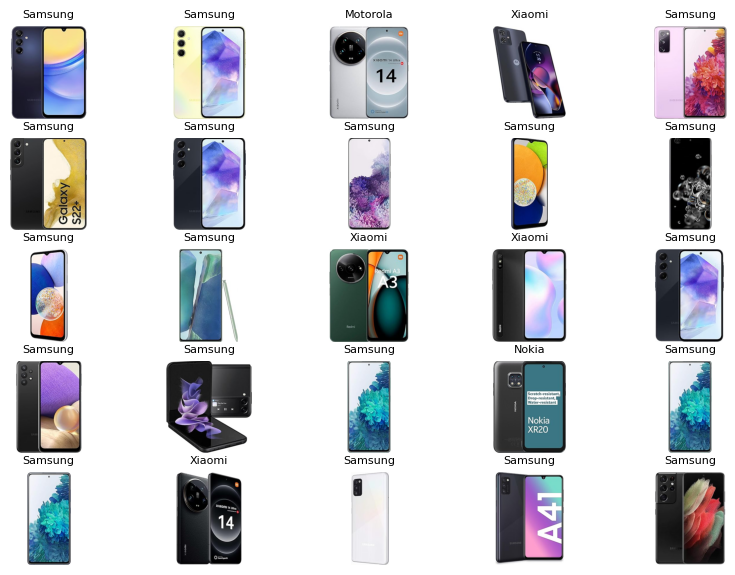

In [39]:
# Visualise series of mobile phone images in a matrix (before transformation)
nrows = 5
ncols = 5
fig, img = plt.subplots(nrows,ncols, figsize=(10,7))
for i in range(nrows):
  for j in range(ncols):
    image = img[i,j]
    idx = i*ncols + j # formula of computing consequtive rows filled with images
    image.imshow(img_dataset[idx][0])
    image.set_title(f"{img_dataset[idx][1]}", fontsize=8)
    image.axis("off")

## Image Preprocessing

+ Resize images
+ Convert images to RGB
+ Normalize images

In [40]:
# Resize and convert mobile phone images 
resize_tf = transforms.Resize((128,128))
tensor_tf = transforms.ToTensor()

# Reconstruct images with transformation
mp_transform = transforms.Compose([resize_tf, tensor_tf])
img_dataset = MobileImageDataset(csv_file="dataset.csv", data_dir=img_source_dir,transform=mp_transform)

**Image Visualisation after Transformation**

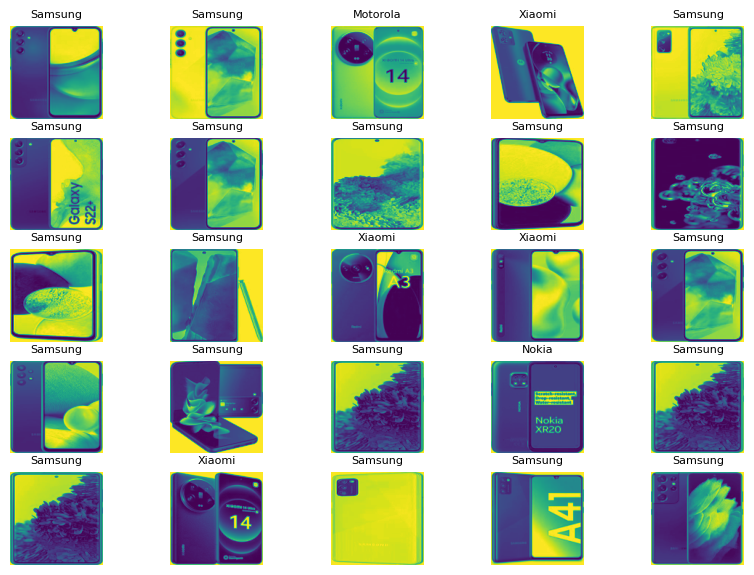

In [71]:
# Visualise series of mobile phone images in a matrix after transformation
nrows = 5
ncols = 5
fig, img = plt.subplots(nrows,ncols, figsize=(10,7))
for i in range(nrows):
  for j in range(ncols):
    image = img[i,j]
    idx = i*ncols + j # formula of computing consequtive rows filled with images
    image.imshow(img_dataset[idx][0][0])
    image.set_title(f"{img_dataset[idx][1]}", fontsize=8)
    image.axis("off")
